In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df=pd.read_csv('E:\\UTD\\ML\\china_gdp.csv')

In [4]:
df.head(5)

,Year,Value
0,1960,5.918412e+10
1,1961,4.955705e+10
2,1962,4.668518e+10
3,1963,5.009730e+10
4,1964,5.906225e+10


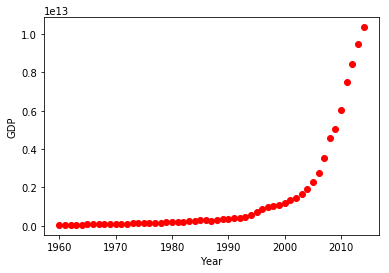

In [5]:
# Plotting the dataset

x_data, y_data=(df['Year'].values,df['Value'].values)
plt.plot(x_data,y_data,'ro')
plt.ylabel('GDP')
plt.xlabel('Year')
plt.show()

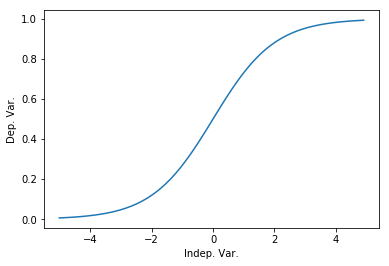

In [6]:
# Modeling
X=np.arange(-5.0,5.0,0.1)
Y=1.0/(1.0+np.exp(-X))
plt.plot(X,Y)
plt.ylabel('Dep. Var.')
plt.xlabel('Indep. Var.')
plt.show()

In [7]:
def sigmoid(x, beta1,beta2):
    y=1/(1+np.exp(-beta1*(x-beta2)))
    return y

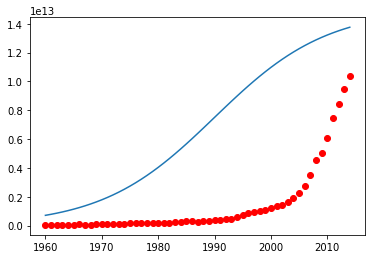

In [9]:
beta_1=0.10
beta_2=1990.0

Y_pred=sigmoid(x_data, beta_1, beta_2)
plt.plot(x_data,Y_pred*15000000000000.)
plt.plot(x_data,y_data,'ro')

To find the best parameters for our model, first normalize our x and y

In [11]:
xdata =x_data/max(x_data)
ydata =y_data/max(y_data)

In [12]:
from scipy.optimize import curve_fit

popt, pcov = curve_fit(sigmoid, xdata, ydata)
print(" beta_1 = %f, beta_2 = %f" % (popt[0], popt[1]))

 beta_1 = 690.451711, beta_2 = 0.997207


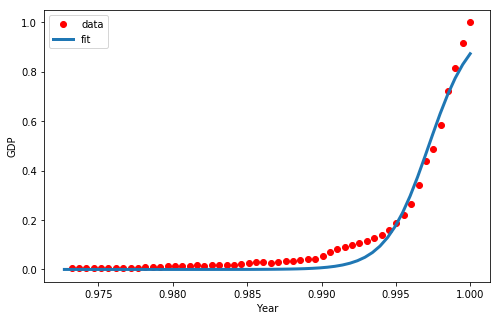

In [13]:
# plot the resulting regression model.

x = np.linspace(1960, 2015, 55)
x = x/max(x)
plt.figure(figsize=(8,5))
y = sigmoid(x, *popt)
plt.plot(xdata, ydata, 'ro', label='data')
plt.plot(x,y, linewidth=3.0, label='fit')
plt.legend(loc='best')
plt.ylabel('GDP')
plt.xlabel('Year')
plt.show()

Model Accuracy



In [22]:
# split data into train/test

msk = np.random.rand(len(df)) < 0.8
train_x = xdata[msk]
test_x = xdata[~msk]
train_y = ydata[msk]
test_y = ydata[~msk]

In [23]:
# build the model using train set
popt, pcov = curve_fit(sigmoid, train_x, train_y)

In [24]:
# predict using test set
y_hat = sigmoid(test_x, *popt)

In [25]:
print("Mean absolute error: %.2f" % np.mean(np.absolute(y_hat - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((y_hat - test_y) ** 2))
from sklearn.metrics import r2_score
print("R2-score: %.2f" % r2_score(y_hat , test_y) )

Mean absolute error: 0.04
Residual sum of squares (MSE): 0.00
R2-score: 0.96
